# Project 1

## 0. Understanding the Problem

We are given a number of constants that help identify the best way to solve the kinematics problem. We assign all given constants to a variable and import all modules that will be necessary.

In [15]:
import matplotlib.pyplot as plt
import numpy as np

a = -3  # vehicle decceleration (m/s^2)
v0 = 15.2778  # vehicle velocity (m/s)
tau = 3  # green to red (s)
d = 0.8  # reaction time (s)
w = 30  # intersection width (m)

## 1. Equations of motion

We begin by creating the equations of motion for the vehicle. We must split the vehicles trajectory into three parts. The first part is when the vehicle moves at constant velocity before the traffic signal changes color:

$x(t) = -x_0 + v_0t$ , where $v_0 = 15.3$ $m/s$

The next part is for the vehicle's trajectory if the driver decides to decelerate:

$x(t) = -x_0 + v_0t - \frac{a}{2}t^2$  &  $v(t) = v_0 - at$, where $v_0 = 15.3$ $m/s$  &  $a = -3$ $m/s^2$

The last part is for the situation in which the vehicle has come to a complete stop ($v = 0$):

$x = x_{final}$

Now that we understand what equations we need to use, we can create definitions for functions that will plot our equations of motion (EoMs) for any given constants. Since most of the parameters are constant, the definitions will only require the initial position and total time interval.

In [16]:
def eqdrive(xinitial, timedrive):
    t = np.arange(0 , timedrive + 0.1 , 0.1)
    x = []
    v = []
    for i in t:
        i = xinitial + v0*i
        x.append(i)
        v.append(v0)
    return x, v

def eqbrake(xinitialbrake, timebrake):
    reactioninterval = np.arange(0 , d , 0.1)
    postreaction = np.arange(d , timebrake + 0.1, 0.1)
    position = []
    velocity = []
    tzerov = (- v0 / a) + d
    finalprereactionx = xinitialbrake + v0*d
    for ii in reactioninterval:
        prereactionx = xinitialbrake + v0*ii
        prereactionv = v0
        position.append(prereactionx)
        velocity.append(prereactionv)
    for i0 in postreaction:
        if i0 < tzerov:
            postreactionv = v0 + a * (i0 - d)
            postreactionx = finalprereactionx + (v0 * (i0 - d)) + ((a/2) * (i0 - d)**2)
            position.append(postreactionx)
            velocity.append(postreactionv)
        if i0 >= tzerov:
            xi = finalprereactionx + v0 * (tzerov - d) + (a/2) * (tzerov - d)**2
            vi = 0
            position.append(xi)
            velocity.append(vi)
    return position, velocity

## 2. Plotting/Analyzing EoMs for Different Initial Positions

### Part A

We will begin by creating two definitions, $plotposition$ and $plotspeed$, which will plot the equations of motion for us. We will add a red dashed line on both plots to indicate when the three second interval has passed. We will also add a gray block to indicate when the vehicle is in the interseection. Lastly, we will create a definition that calls both previous definitions and plots them side by side.

In [19]:
def plotposition(taxis, initialposition):
    totaltime = np.arange(0, taxis + 0.1, 0.1)
    plt.rc('grid', linestyle="dotted", color='black', alpha=0.2)
    plt.grid(True)
    plt.plot(totaltime, eqbrake(initialposition, taxis)[0], '-', label = 'Brake')
    plt.plot(totaltime, eqdrive(initialposition, taxis)[0], '-', label = 'Drive')
    plt.plot([tau, tau], [initialposition, 1.05*w], "--", color="red", lw=1)
    plt.fill_between([0, 7], [w, w], color="black", alpha=0.3)
    plt.xlabel('Time t (s)')
    plt.ylabel('Position x(t) (m)')
    plt.title('$x(t) = x_0 + v_0t - (a/2) t^2$')
    plt.legend()
    
def plotspeed(xaxis, initialpos):
    totalt = np.arange(0, xaxis + 0.1, 0.1)
    plt.rc('grid', linestyle="dotted", color='black', alpha=0.2)
    plt.grid(True)
    plt.plot(totalt, eqbrake(initialpos, xaxis)[1], '-', label = 'Brake')
    plt.plot(totalt, eqdrive(initialpos, xaxis)[1], '-', label = 'Drive')
    plt.plot([tau, tau], [initialpos/200, w/1.8], "--", color="red", lw=1)
    plt.xlabel('Time t (s)')
    plt.ylabel('Velocity(t) (m/s)')
    plt.title('$v(t) = v_0 + at$')
    plt.legend()
    
def ploteoms(x0, tt):
    plt.subplot(1, 2, 1)
    plotposition(tt, x0)
    plt.subplot(1, 2, 2)
    plotspeed(tt, x0)
    plt.tight_layout()
    plt.show()

### Part B

Now that we can plot the EoMs, the first scenario we will consider is that where the traffic signal changes to yellow while the driver is 30 meters from the intersection. 

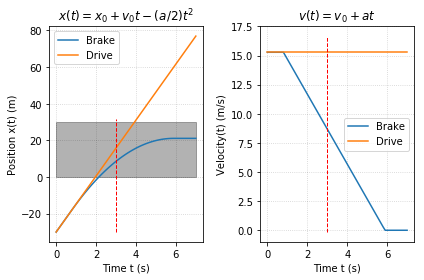

In [20]:
ploteoms(-30, 7)

$Figure$ 1. EoMs plots for the first scenario ($x_0 = -30$).

From figure 1 we can see that the driver approaches a dangerous situation in both cases. The next scenario has the light change color at 70 meters from the intersection.

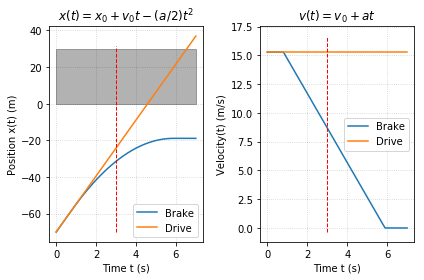

In [21]:
ploteoms(-70, 7)

$Figure$ 2. EoMs plots for the second scenario ($x_0=-70$).

From figure 2 we can see that in both cases, the three seconds pass before the driver gets to the intersection.  $t = 3$. Thus, both cases seem rather safe. The last case we will consider for now is the case where the light changes at $x_0 = -0.5$m.

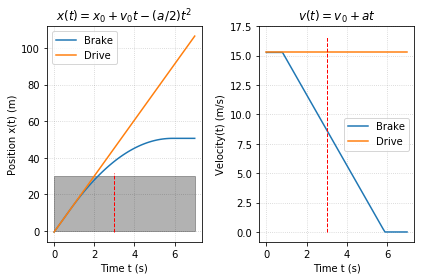

In [22]:
ploteoms(-0.5,7)

$Figure$ 3. EoMs plots for the third case ($x_0=-0.5$).

From figure 3 we see that in either case, the situation at hand seems safe.

### Part C

We can establish a set of rules that will help us identify which case/decision is safe based on the vehicle's trajectory. We will classify each outcome as safe if,

for driving: $x>W$ for $t>\tau$,  or

for braking: $x<0$ for all $t$.

All other cases will be classified as dangerous. The outcome for a given $x_0$ will be safe overall if there exists at least one safe decision.

Analyzing figure 1, we see that neither of the safe conditions are met for either decision. Thus, the outcome for $x_0=-30m$ is dangerous. Figure 2 shows a distinct outcome. The vehicle does not clear the intersection before the three seconds, but it does come to a full stop before the intersection if it were to brake. Thus, the outcome for $x_0=-70m$ is safe. Lastly, figure 3 is also different. The vehicle fails to stop before the intersection if it decides to brake, but can clear it if it keeps moving at constant velocity. Thus, the outcome for $x_0=-0.5m$ is safe.

### Part D

We can map every possible outcome by considering three zones. The first zone is for $x > W$ for $t>\tau$ (the $x_0^A$ zone). The second zone is for $x<0$ for all $t$ (the $x_0^B$ zone). The third zone is for every other possible value of $x_0$. Thus, zones one and two are for safe values of $x_0$ while the third zone isn't.

Dilemma zone goes from -38.5 m to -16.0 m


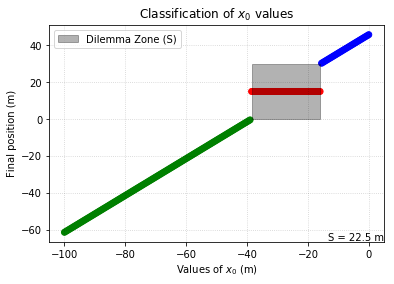

In [43]:
x0s = np.arange(-100, 0.5, 0.5)
classifiedx0s = []
finalxs = [] 
dilemma = []  
for i in x0s:
    finalstop = i + (v0 * d) + (v0 * (tau - d)) + ((a/2) * (tau - d)**2)
    finalx = i + v0*tau
    if finalstop < 0:
        finalxs.append(finalstop)
        classifiedx0s.append('green')
    if finalx > w:
        classifiedx0s.append('blue')
        finalxs.append(finalx)
    if finalx < w and finalstop > 0:
        classifiedx0s.append('red')
        finalxs.append(15)
        dilemma.append(i)
plt.scatter(x0s, finalxs, c = classifiedx0s)
plt.rc('grid', linestyle="dotted", color='black', alpha=0.2)
plt.grid(True)
plt.fill_between([min(dilemma), max(dilemma)], [w, w], color="black", alpha=0.3, label = 'Dilemma Zone (S)')
plt.legend()
plt.xlabel('Values of $x_0$ (m)')
plt.ylabel('Final position (m)')
plt.title('Classification of $x_0$ values')
ax = plt.gca()
plt.text(1, 0, 'S = 22.5 m', horizontalalignment='right',
     verticalalignment='bottom',
     transform = ax.transAxes)
print('Dilemma zone goes from', min(dilemma), 'm to', max(dilemma),'m')

$Figure$ 4. Classification of $x_0$ values where green corresponds to the $x_0^B$ region (safe to brake), blue to the $x_0^A$ (safe to drive), and gray box with red line to all values that lie in the dilemma zone ($S = x_0^A - x_0^B$).

We can see from the plot that the dilemma zone ranges from -38.5m to -16.0m. Thus, every value within these two points would mean that the vehicle is approaching a dangerous scenario regardless of the decision the driver makes.

### Part E

To solve the problem analytically, we begin by calculating the smallest value of $x_0$ that falls in the $x_0^A$ zone. All we have to do is rearrange the EoM for $x$ due to constant velocity, $15.3$ $m/s$, 

$x = x_0^A + vt$. 

We use $x=W$ since that is the point where the inersection ends and $t=3s$ since that's how much time we are allowed to clear the intersection.

$x_0^A = W - v_0*\tau = -16m$

The next step is to determine the largest possible value of $x_0^B$. This time, we split the EoM into two parts, the constant speed and the deceleration. The deceleration is as follows,

$x=x_0^{B1} + v_0t + \frac{a}{2} t^2$

We let $x=0$ and $t=\tau - \delta$ and we solve for $x_0^{B1}$.

$x_0^{B1} = -v_0 (\tau - \delta) - \frac{a}{2} (\tau - \delta)^2 = -26.2m$

To account for $\delta$, we find the distance traveled at a constant velocity,

$x_0^{B2} = v_0 \delta = 12.2m$ 

$x_0^B = x_0^{B1} - x_0^{B2} = -38.5m$

Finally, we find the dilemma zone, S,

$S = x_0^A - x_0^B = 22.5m$

### Part F

The dilemma zone is shifted by a change in $v_0$, but the range remains the same. Thus, $S$ is independant of $v_0$.